# Hessian

## Preamble

In [8]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import autograd.numpy as np
from autograd import grad, jacobian, hessian

import matplotlib.pyplot as plt
import helpers as h

In [34]:
assert "autograd" in np.__file__ # Need to make sure that we get the correct numpy - my config might import the default one.

# What's that Hessian do?

The local approximation to some function f is given by the Taylor expansion:

$$
f(x + a) = f(x) + f'(x)\,a + \frac{1}{2} f''(x)\, x^2
$$

or in two dimensions
$$
f(\vec{x} + \vec{a}) = f(\vec{x}) + \vec{a}^{T} \nabla{}\!f(\vec{x}) + \vec{a}^{T} \nabla{}^{2}\! f(\vec{x}) \vec{a}
$$

where $\nabla{}^{2}$ is the hessian matrix.

[-0.23606798  4.23606798] [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]
Hessian is indefinite


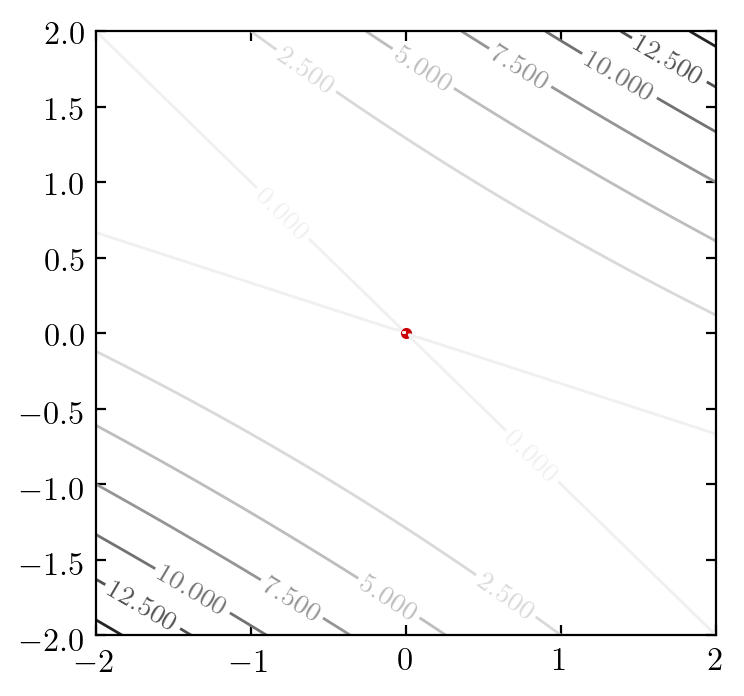

In [35]:
g = np.array([0, 0])
hess = np.array([
    [1, 2],
    [2, 3]],
)
h.plot_hess(g, hess)

[-1. -5.] [[1.         0.4472136 ]
 [0.         0.89442719]]
Hessian is ND


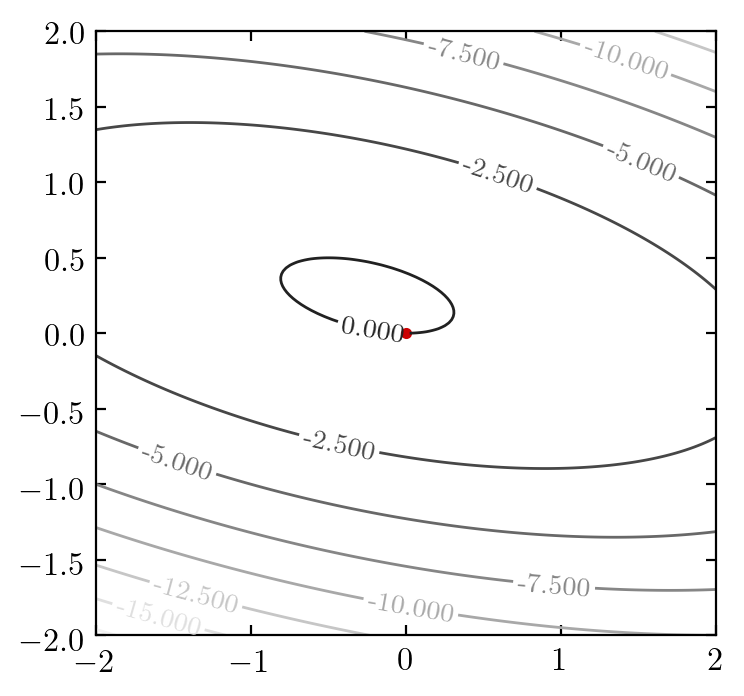

In [38]:
g = np.array([0, 1])
hess = np.array([
    [-1, -2],
    [0, -5]],
)
h.plot_hess(g, hess)

# Taylor Expansions

## 1d

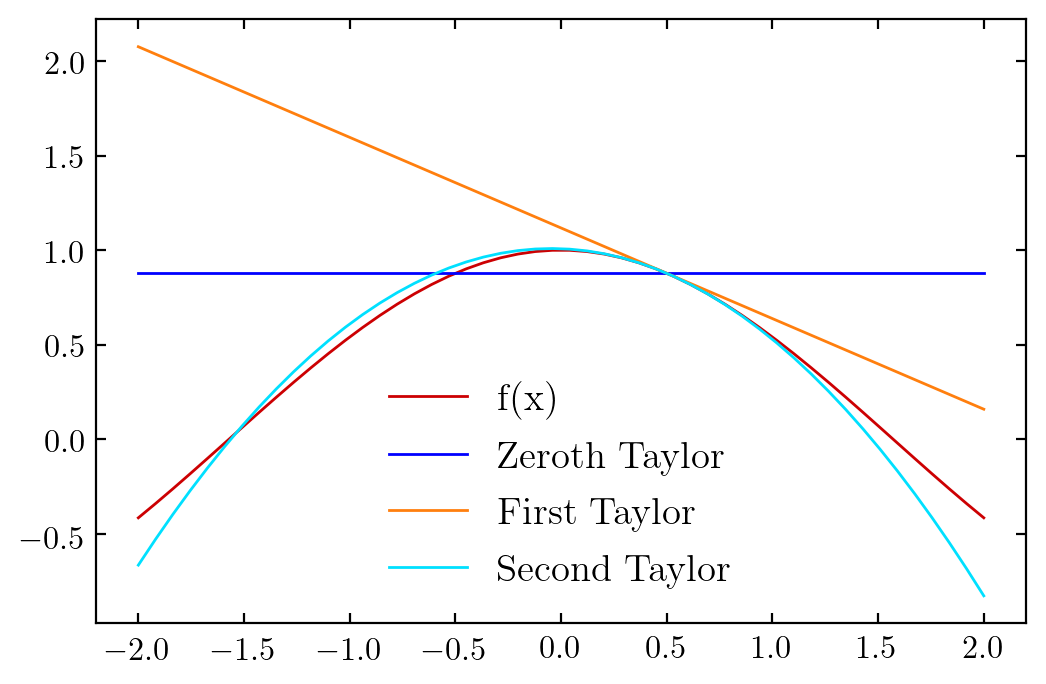

In [40]:
f = np.cos
df = grad(f)
df2 = grad(df)

_, ax = plt.subplots()

x = np.linspace(-2, 2)
x0 = 0.5

ax.plot(x, f(x), label="f(x)")
ax.plot(x, h.taylor_1d(x-x0, f(x0), 0, 0), label="Zeroth Taylor")
ax.plot(x, h.taylor_1d(x-x0, f(x0), df(x0), 0), label="First Taylor")
ax.plot(x, h.taylor_1d(x-x0, f(x0), df(x0), df2(x0)), label="Second Taylor")
ax.legend()

## 2d

In [41]:
x = np.linspace(-1, 1, num=200)
y = np.linspace(-1, 1, num=200)
grid = np.array(np.meshgrid(x, y))

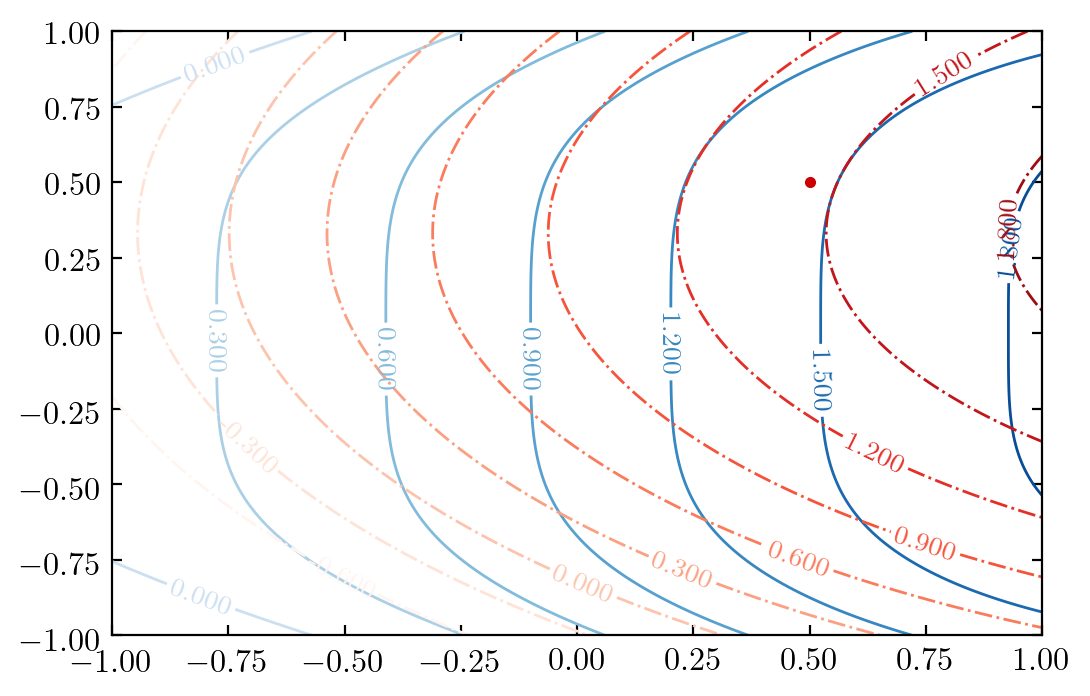

In [44]:
f = lambda x: np.sin(x[0,]) + np.cos(x[1,]**2)
grad_f = jacobian(f)
hess_f = hessian(f)

x0 = np.array([0.5, 0.5])


_, ax = plt.subplots()
cs = ax.contour(grid[0], grid[1], f(grid), cmap="Blues")
ax.clabel(cs, fontsize="x-small")
cs = ax.contour(grid[0], grid[1], h.taylor_2d(grid, x0, f(x0), grad_f(x0), hess_f(x0)), cmap="Reds", linestyles="-.", levels=cs.levels)
ax.clabel(cs, fontsize="x-small")
ax.scatter(x0[0], x0[1])